# 9 Final comparison of all results

<b> Purpose of the action </b> - compare the results of machine learning models with predictions of the bookmaker Bet365

<b> </b>
<b> Action plan </b>:
- Calculate the accuracy of Bet365 bookmaker predictions based on pre-match rates
- Compare all previously saved model results and bookmaker predictions
- Make a final conclusions

## 9.1 Import nessesary libraries and modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_preprocessing import binary_labels
from sklearn import metrics

## 9.2 Calculate the accuracy of Bet365 bookmaker forecasts for the tested part of the 2019-2020 season

### 9.2.1 Read data

- FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win) - <b> target column </b>
- B365H = Bet365 home win odds
- B365A = Bet365 away win odds

In [2]:
# define columns to import
usecols=['FTR', 'B365H', 'B365A']

test_set = pd.read_csv('./test_dataset/2019-2020.csv', usecols=usecols).iloc[50:].reset_index(drop=True)
test_set.head()

,FTR,B365H,B365A
0,A,2.05,3.50
1,H,2.87,2.37
2,H,2.00,3.50
3,A,1.61,6.00
4,H,1.10,21.00


### 9.2.2 Calculate the accuracy and other forecast metrics of the bookmaker Bet365

I assumed that if the odds for the home team are lower than for the opposing team then the bookmaker indicates home team to be the winner

#### 9.2.2.1 Define bookmaker predictions

In [3]:
# change target labels to binary labels
test_set = binary_labels(test_set, target='FTR')

# add prediction column by Bet365 bookmaker to the data frame
test_set['Prediction'] = (test_set['B365H'] < test_set['B365A']).astype('int')

# define true and predicted labels
y_true = np.array(test_set['FTR'])
y_pred = np.array(test_set['Prediction'])

test_set.head()

,FTR,B365H,B365A,Prediction
0,0,2.05,3.50,1
1,1,2.87,2.37,0
2,1,2.00,3.50,1
3,0,1.61,6.00,1
4,1,1.10,21.00,1


#### 9.2.2.2 Calculate prediction metrics and put them all in dataframe

In [4]:
# calculate metrics
accuracy_score = metrics.accuracy_score(y_true, y_pred) 
precision_score = metrics.precision_score(y_true, y_pred) 
recall_score = metrics.recall_score(y_true, y_pred) 
f1_score = metrics.f1_score(y_true, y_pred)
roc_auc_score = metrics.roc_auc_score(y_true, y_pred) 

# create dictionary of results 
results_dict = {'precision_score': [precision_score], 
               'recall_score': [recall_score], 
               'f1_score': [f1_score],
               'roc_auc_score' : [roc_auc_score],
               'accuracy_score' : [accuracy_score]}

bet365_results = pd.DataFrame(data=results_dict)
bet365_results.insert(loc=0, column='Model', value='Bet365Bookmaker')
bet365_results                                                      

,Model,precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
0,Bet365Bookmaker,0.536585,0.785714,0.637681,0.623989,0.605263


## 9.3 Compare all results

### 9.3.1 Read all machine learning model results

In [5]:
# results for tree-based models
tree_models_resuls = pd.read_csv("./results/tree_models_results.csv", index_col=0)

# results for linear model
linear_models_results = pd.read_csv("./results/linear_models_results.csv", index_col=0)

# results for neural network
neural_networks_results = pd.read_csv("./results/neural_networks_results.csv", index_col=0)

# results for advance ensebling models
advance_ensembling_results = pd.read_csv("./results/advance_ensembling_models_results.csv", index_col=0)

### 9.3.2 Combine all the resulting data frames in one table and show them

In [6]:
all_results = pd.concat(objs=(tree_models_resuls, 
                              linear_models_results, 
                              neural_networks_results, 
                              advance_ensembling_results,
                              bet365_results), 
                        ignore_index=True)

# all_results['Model'] = all_results['Model'].str.replace(r'Classifier', '')
all_results.set_index('Model', inplace=True)
np.round(all_results,4)

,precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
Model,,,,,
RandomForestClassifier,0.6234,0.5714,0.5963,0.7040,0.6579
AveragingRandomForestClassifier,0.6164,0.5357,0.5732,0.7063,0.6474
AdaBoostClassifier,0.6463,0.6310,0.6386,0.7475,0.6842
AveragingAdaBoostClassifier,0.6329,0.5952,0.6135,0.7335,0.6684
XGBClassifier,0.6765,0.5476,0.6053,0.7527,0.6842
AveragingXGBClassifier,0.6329,0.5952,0.6135,0.7437,0.6684
CatBoostClassifier,0.6375,0.6071,0.6220,0.7400,0.6737
AveragingCatBoostClassifier,0.6282,0.5833,0.6049,0.7443,0.6632
TreeModelsAveragingClassifier,0.6400,0.5714,0.6038,0.7382,0.6684


### 9.3.4 Plot results

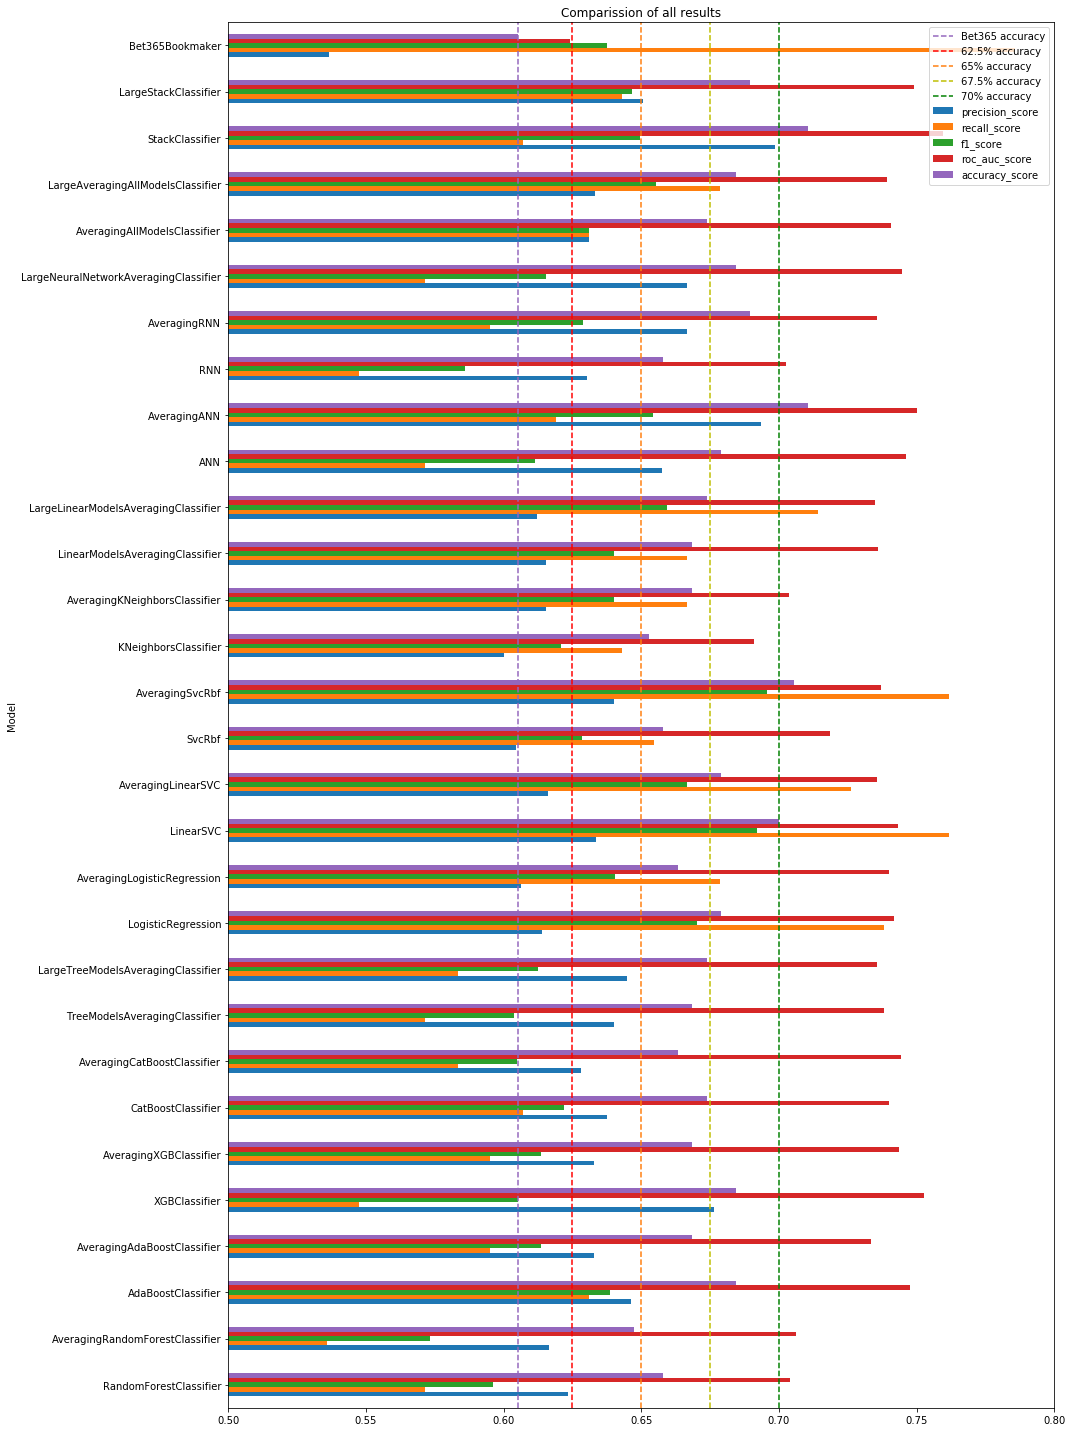

In [7]:
all_results.plot.barh(figsize=(15,20), xlim=(0.5, 0.8))
plt.axvline(x=accuracy_score, color='tab:purple', alpha=1, ls='--', label='Bet365 accuracy')
plt.axvline(x=0.625, color='r', alpha=1, ls='--', label='62.5% accuracy')
plt.axvline(x=0.65, color='tab:orange', alpha=1, ls='--', label='65% accuracy')
plt.axvline(x=0.675, color='y', alpha=1, ls='--', label='67.5% accuracy')
plt.axvline(x=0.7, color='g', alpha=1, ls='--', label='70% accuracy')
plt.legend(loc='upper right')
plt.title('Comparission of all results')
plt.tight_layout()
# plt.savefig('final_results')
plt.show()

### 9.4 Make a final conclussions

<b> Conclussions: </b>
- All machine learning models obtained siglty better accuracy than the Bet365Bookmaker (60,5%)
- The worst machine learning models achieved about 65% accuracy: KNeighborsClassifier and averaging version of RandomForestClassifier
- On average, machine learning models achieved results within 66-68%
- The best machine learning models achieved just over 71% accuracy: StackClassifier and averaging version of Neural Network (AveragingANN)
- Linear models usually received slightly better results than tree-based models
- Averaged versions of simple machine learning models usually performed slightly worse than individual models (except RBF and KNN)
- Averaged versions of deep learning models perform significant better than single neural network
- Advanced ensembling models have obtained results a little below expectation (except StackClassifier)

<b> Future improvment: </b>
- Collect data from more seasons
- Add more useful stats available only for latest seasons (like Team Hit Woodwork or Team Bookings Cards Points)
- Add more features from other data sources (bookmacher odds, player specific health stats)
- Add Sentiment from Twitter, News Articles
- Create more dependencies on features
- Choose better or more advanced machine learning models